In [120]:
pip install tensorflow

     |████████████████████████████████| 207.1 MB 98 kB/s  eta 0:00:012    |███▏                            | 20.5 MB 9.3 MB/s eta 0:00:21     |████████████████████▋           | 133.2 MB 15.4 MB/s eta 0:00:05
     |████████████████████████████████| 126 kB 62.0 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 6.3 MB/s eta 0:00:011
     |████████████████████████████████| 4.2 MB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 9.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 14.3 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 673 kB/s eta 0:00:01
     |████████████████████████████████| 13.0 MB 7.3 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 3.2 MB/s eta 0:00:011
     |████████████████████████████████| 961 kB 584 kB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 16.0 MB/s eta 0:00:01
     |████████████████████████████████| 157 kB 3.7 MB/s eta 0:00:01
     |████████████████████████████████| 9

Note: you may need to restart the kernel to use updated packages.


In [121]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [48]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
df_churn = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [32]:
df_churn[pd.to_numeric(df_churn.TotalCharges, errors='coerce').isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [42]:
df1 = df_churn[df_churn.TotalCharges != " "]
df1.shape

(7032, 21)

In [43]:
df1.TotalCharges.iloc[488]

'74.35'

In [44]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

/Users/giacomo/opt/anaconda3/envs/labs/lib/python3.8/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


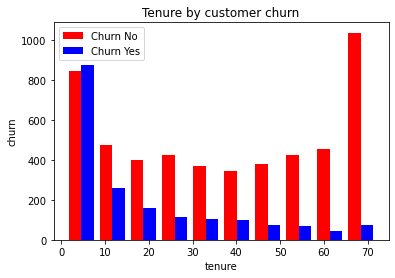

In [55]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel('tenure')
plt.ylabel('churn')
plt.title('Tenure by customer churn')

plt.hist([tenure_churn_no, tenure_churn_yes], color=['red','blue'], label=['Churn No', 'Churn Yes'])
plt.legend()

plt.show()

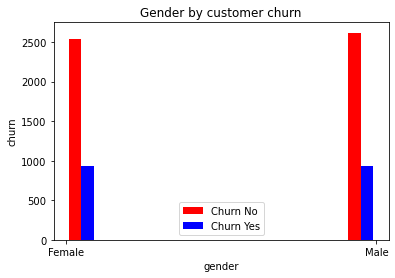

In [57]:
tenure_churn_no = df1[df1.Churn=='No'].gender
tenure_churn_yes = df1[df1.Churn=='Yes'].gender

plt.xlabel('gender')
plt.ylabel('churn')
plt.title('Gender by customer churn')

plt.hist([tenure_churn_no, tenure_churn_yes], color=['red','blue'], label=['Churn No', 'Churn Yes'])
plt.legend()

plt.show()

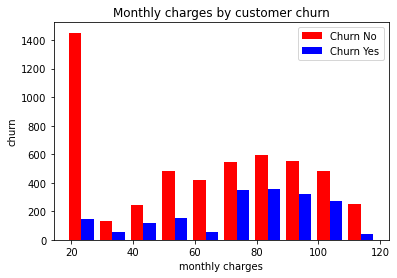

In [58]:
tenure_churn_no = df1[df1.Churn=='No'].MonthlyCharges
tenure_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel('monthly charges')
plt.ylabel('churn')
plt.title('Monthly charges by customer churn')

plt.hist([tenure_churn_no, tenure_churn_yes], color=['red','blue'], label=['Churn No', 'Churn Yes'])
plt.legend()

plt.show()

In [94]:
df1.OnlineSecurity.replace('No internet service', 'No', inplace = True)
df1.MultipleLines.replace('No phone service', 'No', inplace = True)
df1.OnlineBackup.replace('No internet service', 'No', inplace = True)
df1.DeviceProtection.replace('No internet service', 'No', inplace = True)
df1.TechSupport.replace('No internet service', 'No', inplace = True)
df1.StreamingTV.replace('No internet service', 'No', inplace = True)
df1.StreamingMovies.replace('No internet service', 'No', inplace = True)

In [95]:
for col in df1:
    print(f'{col} : {df1[col].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : ['No' 'Yes']


In [96]:
def print_unique_col_values(df1):
    for col in df1:
        if df1[col].dtypes == 'object':
         print(f' {col} : {df1[col].unique()}')

In [97]:
print_unique_col_values(df1)

 gender : ['Female' 'Male']
 Partner : ['Yes' 'No']
 Dependents : ['No' 'Yes']
 PhoneService : ['No' 'Yes']
 MultipleLines : ['No' 'Yes']
 InternetService : ['DSL' 'Fiber optic' 'No']
 OnlineSecurity : ['No' 'Yes']
 OnlineBackup : ['Yes' 'No']
 DeviceProtection : ['No' 'Yes']
 TechSupport : ['No' 'Yes']
 StreamingTV : ['No' 'Yes']
 StreamingMovies : ['No' 'Yes']
 Contract : ['Month-to-month' 'One year' 'Two year']
 PaperlessBilling : ['Yes' 'No']
 PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
 Churn : ['No' 'Yes']


In [99]:
yes_no_cols = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines','OnlineSecurity', 'PaperlessBilling',
              'Churn', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in yes_no_cols:
    df1[col].replace({'Yes' : 1, 'No' : 0}, inplace=True)

In [102]:
for col in df1:
    print(f'{col} : {df1[col].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [103]:
df1.gender.replace({'Female' : 1, 'Male' : 0}, inplace = True)

In [106]:
df2 = pd.get_dummies(data=df1, columns = ['InternetService', 'Contract', 'PaymentMethod'])
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [107]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [109]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [110]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [115]:
#training and testing split

x = df2.drop('Churn', axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)

In [118]:
len(x_train.columns)

26

In [124]:
#importing deep learning libraries

import tensorflow as tf
from tensorflow import keras

In [129]:
#creating the neural network model and implementing it on the training set

model = keras.Sequential ([
    #numbers of layers as per number of columns
    
    keras.layers.Dense(26, input_shape = (26,), activation = 'relu'), 
    keras.layers.Dense(6, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'Adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy']) 

model.fit(x_train, y_train, epochs = 100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5110 - accuracy: 0.7449
Epoch 2/100
176/176 [==============================] - 0s 999us/step - loss: 0.4301 - accuracy: 0.7927
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4200 - accuracy: 0.7979
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4171 - accuracy: 0.8025
Epoch 5/100
176/176 [==============================] - 0s 982us/step - loss: 0.4135 - accuracy: 0.8007
Epoch 6/100
176/176 [==============================] - 0s 993us/step - loss: 0.4111 - accuracy: 0.8053
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4102 - accuracy: 0.8068
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4091 - accuracy: 0.8060
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4075 - accuracy: 0.8059
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4062 - 

176/176 [==============================] - 0s 1ms/step - loss: 0.3648 - accuracy: 0.8311
Epoch 82/100
176/176 [==============================] - 0s 953us/step - loss: 0.3636 - accuracy: 0.8322
Epoch 83/100
176/176 [==============================] - 0s 984us/step - loss: 0.3638 - accuracy: 0.8316
Epoch 84/100
176/176 [==============================] - 0s 970us/step - loss: 0.3638 - accuracy: 0.8284
Epoch 85/100
176/176 [==============================] - 0s 966us/step - loss: 0.3632 - accuracy: 0.8297
Epoch 86/100
176/176 [==============================] - 0s 956us/step - loss: 0.3620 - accuracy: 0.8332
Epoch 87/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3639 - accuracy: 0.8313
Epoch 88/100
176/176 [==============================] - 0s 959us/step - loss: 0.3611 - accuracy: 0.8313
Epoch 89/100
176/176 [==============================] - 0s 980us/step - loss: 0.3620 - accuracy: 0.8302
Epoch 90/100
176/176 [==============================] - 0s 1ms/step - loss: 0.363

In [130]:
#evaluating the model accuracy on test data set

model.evaluate(x_test, y_test)

44/44 [==============================] - 0s 910us/step - loss: 0.4710 - accuracy: 0.7733


[0.47099974751472473, 0.7732764482498169]

In [138]:
#predicting on testing set

yp = model.predict(x_test)
yp

array([[0.11619011],
       [0.34117237],
       [0.00718871],
       ...,
       [0.6397842 ],
       [0.61076033],
       [0.7966736 ]], dtype=float32)

In [139]:
# binning the predictions to be either 1 or 0

y_pred = []

for element in yp:
    if element > 0.5:
        y_pred.append(1)
    
    if element < 0.5:
        y_pred.append(0)

In [146]:
y_pred[:10]

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0]

In [144]:
#from this 2 wrong out of 8

y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [148]:
# building classification matrix 

from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       999
           1       0.66      0.45      0.53       408

    accuracy                           0.77      1407
   macro avg       0.73      0.68      0.69      1407
weighted avg       0.76      0.77      0.76      1407



Text(69.0, 0.5, 'actual')

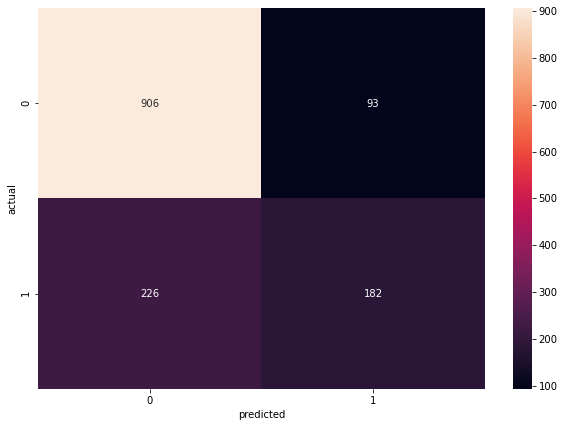

In [150]:
# classification heat map

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')

plt.xlabel('predicted')
plt.ylabel('actual')